# Validate Boreal Forest Height in Eurasia with field plots

In [2]:
library(sf)
library(fs)
library(tidyverse)

Linking to GEOS 3.11.1, GDAL 3.6.2, PROJ 9.1.0; sf_use_s2() is TRUE

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [1]:
install.packages('plyr')
library(plyr)

NameError: name 'install' is not defined

In [2]:
install.packages("remotes")
library(remotes)
remotes::install_github('https://github.com/ropensci/rnaturalearthhires')
library(rnaturalearthhires)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Skipping install of 'rnaturalearthhires' from a github remote, the SHA1 (db8e433b) has not changed since last install.
  Use `force = TRUE` to force installation



In [3]:
install.packages("rnaturalearth")
library(rnaturalearth)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
install.packages("rnaturalearthdata")
library(rnaturalearthdata)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘rnaturalearthdata’


The following object is masked from ‘package:rnaturalearth’:

    countries110




In [345]:
install.packages("mapproj")
library(mapproj)

also installing the dependency ‘maps’


Warning message in install.packages("mapproj"):
“installation of package ‘maps’ had non-zero exit status”
Warning message in install.packages("mapproj"):
“installation of package ‘mapproj’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



ERROR: Error in library(mapproj): there is no package called ‘mapproj’


In [5]:
install.packages("patchwork")
library(patchwork)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [348]:
source('/projects/code/3dsi/boreal_map_functions.R') 

[1] "MAAP"
[1] "MAAP"


ERROR: Error in library(mapproj): there is no package called ‘mapproj’


In [6]:
library(terra)

terra 1.7.29


Attaching package: ‘terra’


The following object is masked from ‘package:patchwork’:

    area


The following object is masked from ‘package:tidyr’:

    extract




In [7]:
options(repr.plot.width = 9, repr.plot.height = 5, repr.plot.res = 300)

In [8]:
sib_rivers <- terra::vect('/projects/my-public-bucket/databank/arc/siberia_rivers_v6.shp') %>% st_as_sf()

Warning message:
“[vect] Z coordinates ignored”


In [9]:
riv = ne_download(scale = 10, type = 'rivers_lake_centerlines', category = 'physical', returnclass = "sf")
lakes = ne_download(scale = 10, type = 'lakes', category = 'physical', returnclass = "sf")

Reading layer `ne_10m_rivers_lake_centerlines' from data source 
  `/tmp/RtmpUCoswz/ne_10m_rivers_lake_centerlines.shp' using driver `ESRI Shapefile'
Simple feature collection with 1473 features and 38 fields
Geometry type: MULTILINESTRING
Dimension:     XY
Bounding box:  xmin: -164.9035 ymin: -52.15775 xmax: 177.5204 ymax: 75.79348
Geodetic CRS:  WGS 84
Reading layer `ne_10m_lakes' from data source `/tmp/RtmpUCoswz/ne_10m_lakes.shp' using driver `ESRI Shapefile'
Simple feature collection with 1355 features and 41 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -165.9656 ymin: -50.66967 xmax: 177.1544 ymax: 81.95521
Geodetic CRS:  WGS 84


In [10]:
boreal = st_read('/projects/my-public-bucket/databank/arc/wwf_circumboreal_Dissolve.gpkg')

Reading layer `wwf_circumboreal_Dissolve' from data source 
  `/projects/my-public-bucket/databank/arc/wwf_circumboreal_Dissolve.gpkg' 
  using driver `GPKG'
Simple feature collection with 2 features and 4 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -5281040 ymin: -60527.9 xmax: 3959203 ymax: 8747447
Projected CRS: NAD83 / Alaska Albers


In [11]:
TYPE = 'value_ht_L30_2020'
meisner_df = st_read(paste0('/projects/my-private-bucket/reference/extracted/Miesner_plots_',TYPE,'.gpkg'))
nasa_df =    st_read(paste0('/projects/my-private-bucket/reference/extracted/eurasia_forest_structure_plots_smrytrees_20240124_',TYPE,'.gpkg'))
#nfi_df =     st_read('/projects/my-private-bucket/reference/extracted/nfi_plus_20220603_s3_esa_agb_age_ht.gpkg')

Reading layer `Miesner_plots_value_ht_L30_2020' from data source 
  `/projects/my-private-bucket/reference/extracted/Miesner_plots_value_ht_L30_2020.gpkg' 
  using driver `GPKG'
Simple feature collection with 226 features and 59 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -3105819 ymin: 2948074 xmax: -469781.8 ymax: 5067858
Projected CRS: unnamed
Reading layer `eurasia_forest_structure_plots_smrytrees_20240124_value_ht_L30_2020' from data source `/projects/my-private-bucket/reference/extracted/eurasia_forest_structure_plots_smrytrees_20240124_value_ht_L30_2020.gpkg' 
  using driver `GPKG'
Simple feature collection with 646 features and 41 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -4119546 ymin: 1830029 xmax: -2058208 ymax: 5249695
Projected CRS: unnamed


In [12]:
# meisner_df = st_read('/projects/my-public-bucket/databank/extract_from_points/Miesner_plots_s3_esa_agb_age_ht.gpkg')
# nasa_df =    st_read('/projects/my-public-bucket/reference/extracted/eurasia_forest_structure_plots_smrytrees_20240124_s3_esa_agb_age_ht.gpkg')
# nfi_df =     st_read('/projects/my-public-bucket/databank/extract_from_points/nfi_plus_20220603_s3_esa_agb_age_ht.gpkg')

In [13]:
# chk_df = st_read('/projects/my-private-bucket/reference/extracted/kotuykan_chk.gpkg') %>% st_transform(crs=4326)
# chk_df

### Prep individual data frames

In [14]:
meisner_df = meisner_df %>% 
    separate(Campaign, sep='_', into=c('cont', 'year','group_name'), remove=FALSE)

# nfi_df_ = nfi_df %>% 
#     separate(meas_date_x, sep='-', into=c('year')) %>%
#     select(ecozone, year, site_height, lorey_height, stem_density_standlive, 
#            #alue_esawc2020,  value_standage2020,
#            value_ht_L30_2020, 
#            #value_AGB_L30_2020.v2023.local
#           ) %>% 
#     rowwise() %>%
#     mutate(ref_ht = mean(c(site_height, lorey_height), na.rm=TRUE))

# Set reference heights
meisner_df$ref_ht = meisner_df$Height.quantile..m...Quantile..98th..
nasa_df$ref_ht = nasa_df$Ht_med
#chk_df$ref_ht = chk_df$Ht_med

# Set reference alphas to a measure of # trees in plot
meisner_df$ref_ht_alpha = meisner_df$Trees......Living.
nasa_df$ref_ht_alpha = nasa_df$N_ht
#chk_df$ref_ht_alpha = chk_df$N_ht
#nfi_df_$ref_ht_alpha = nfi_df_$stem_density_standlive

#nfi_df_$group_name = nfi_df_$ecozone

Warning message:
“Expected 3 pieces. Additional pieces discarded in 7 rows [9, 10, 11, 12, 13,
14, 15].”


In [15]:
colnames(nasa_df %>% as.data.frame())

[1] "index"               "site"                "group_name"         
 [4] "year"                "glas_campaign"       "glas_ndx"           
 [7] "glas_shot"           "rad_m"               "num_plots"          
[10] "plot_area_m2"        "canopy_closure_perc" "N_ht"               
[13] "Ht_min"              "Ht_mean"             "Ht_med"             
[16] "Ht_max"              "Ht_qmch"             "Ht_sd"              
[19] "Ht_se"               "N_dbh"               "DBH_min"            
[22] "DBH_mean"            "DBH_med"             "DBH_max"            
[25] "DBH_sd"              "DBH_se"              "canopy_area_m2_sum" 
[28] "N_dens_ha"           "tcc_perc"            "index1"             
[31] "index_right"         "tile_num"            "tile_version"       
[34] "tile_group"          "map_version"         "Unnamed..0"         
[37] "s3_path"             "local_path"          "file"               
[40] "creation.time"       "value_ht_L30_2020"   "geom"               
[43] "ref_ht"              "ref_ht_alpha"

In [16]:
val_plots_df = rbind(meisner_df %>% select(geom, group_name, year, ref_ht, ref_ht_alpha, value_ht_L30_2020), #, value_esawc2020), 
                     nasa_df %>% select(geom, group_name, year, ref_ht, ref_ht_alpha, value_ht_L30_2020) #, value_esawc2020),
                     #nfi_df_ %>% select(geom, group_name, year, ref_ht, ref_ht_alpha, value_ht_L30_2020, value_esawc2020)
                    #chk_df %>% select(geom, group_name, year, ref_ht, ref_ht_alpha, value_ht_L30_2020, value_esawc2020)
                    ) %>%
                ## Replace NaN with 0 in ref_ht
                #mutate(ref_ht = ifelse(is.na(ref_ht), 0, ref_ht)) %>% 
                # Clean pred ht: set neg to NaN, then filter out NaN
                mutate(value_ht_L30_2020 = ifelse(value_ht_L30_2020 < 0, -1, value_ht_L30_2020)) %>% 
                filter(!is.na(ref_ht)) %>%
                filter(!is.na(value_ht_L30_2020)) %>% 
                # Remove empty geoms
                filter(!st_is_empty(.)) %>%
                mutate(diff_ht = value_ht_L30_2020 - ref_ht)
dim(val_plots_df)
tail(val_plots_df %>% as.data.frame())
str(val_plots_df)

[1] 632   7

group_name         year ref_ht ref_ht_alpha value_ht_L30_2020
627 Northernmost (AWI) 2013 0.0    363          5.043251         
628 Northernmost (AWI) 2013 0.0    295          5.966203         
629 Northernmost (AWI) 2013 0.7    187          6.420302         
630 Northernmost (AWI) 2013 1.6    150          7.814756         
631 Northernmost (AWI) 2013 0.4    305          7.917945         
632 Northernmost (AWI) 2013 0.5    328          7.190166         
    geom                     diff_ht 
627 POINT (-2058208 4889822) 5.043251
628 POINT (-2058640 4889454) 5.966203
629 POINT (-2257513 4978875) 5.720302
630 POINT (-2256439 4978021) 6.214756
631 POINT (-2132665 4982332) 7.517945
632 POINT (-2133857 4983135) 6.690166

Classes ‘sf’ and 'data.frame':	632 obs. of  7 variables:
 $ group_name       : chr  "Khatanga" "Khatanga" "Khatanga" "Khatanga" ...
 $ year             : chr  "2011" "2011" "2011" "2011" ...
 $ ref_ht           : num  7.58 9 10 11.92 5 ...
 $ ref_ht_alpha     : num  70 81 28 58 95 262 98 62 184 91 ...
 $ value_ht_L30_2020: num  7.44 5.79 8.13 7.82 3.09 ...
 $ geom             :sfc_POINT of length 632; first list element:  'XY' num  -2152955 4943357
 $ diff_ht          : num  -0.145 -3.208 -1.87 -4.104 -1.906 ...
 - attr(*, "sf_column")= chr "geom"
 - attr(*, "agr")= Factor w/ 3 levels "constant","aggregate",..: NA NA NA NA NA NA
  ..- attr(*, "names")= chr [1:6] "group_name" "year" "ref_ht" "ref_ht_alpha" ...


# Map plots with labels

try and fix label placement:  
https://yutannihilation.github.io/ggsflabel/reference/geom_sf_label.html

In [31]:

val_plots_df$diff_ht = val_plots_df$value_ht_L30_2020 - val_plots_df$ref_ht
val_plots_df$diff_yr = 2020 - as.numeric(val_plots_df$year)

smry_plots_df = val_plots_df %>% 
                #drop_na() %>%
                group_by(group_name, year) %>%
                summarise(st_union(geom), n=n()) %>%
                st_centroid() %>%
                tidyr::unite("group_year", group_name:year, sep = ": ", remove = FALSE) %>% 
                tidyr::unite("group_year_n", c(group_year, n), sep = " ", remove = FALSE) %>% 
                st_jitter(0.5, factor = 0.2)


`summarise()` has grouped output by 'group_name'. You can override using the
`.groups` argument.
Warning message in st_centroid.sf(.):
“st_centroid assumes attributes are constant over geometries of x”


In [18]:
crs(val_plots_df)

[1] "BOUNDCRS[\n    SOURCECRS[\n        PROJCRS[\"unnamed\",\n            BASEGEOGCRS[\"GRS 1980(IUGG, 1980)\",\n                DATUM[\"unknown\",\n                    ELLIPSOID[\"GRS80\",6378137,298.257222101,\n                        LENGTHUNIT[\"metre\",1,\n                            ID[\"EPSG\",9001]]]],\n                PRIMEM[\"Greenwich\",0,\n                    ANGLEUNIT[\"degree\",0.0174532925199433]]],\n            CONVERSION[\"unnamed\",\n                METHOD[\"Albers Equal Area\",\n                    ID[\"EPSG\",9822]],\n                PARAMETER[\"Latitude of 1st standard parallel\",50,\n                    ANGLEUNIT[\"degree\",0.0174532925199433],\n                    ID[\"EPSG\",8823]],\n                PARAMETER[\"Latitude of 2nd standard parallel\",70,\n                    ANGLEUNIT[\"degree\",0.0174532925199433],\n                    ID[\"EPSG\",8824]],\n                PARAMETER[\"Latitude of false origin\",40,\n                    ANGLEUNIT[\"degree\",0.0174532925199433],\n                    ID[\"EPSG\",8821]],\n                PARAMETER[\"Longitude of false origin\",180,\n                    ANGLEUNIT[\"degree\",0.0174532925199433],\n                    ID[\"EPSG\",8822]],\n                PARAMETER[\"Easting at false origin\",0,\n                    LENGTHUNIT[\"Meter\",1],\n                    ID[\"EPSG\",8826]],\n                PARAMETER[\"Northing at false origin\",0,\n                    LENGTHUNIT[\"Meter\",1],\n                    ID[\"EPSG\",8827]]],\n            CS[Cartesian,2],\n                AXIS[\"easting\",east,\n                    ORDER[1],\n                    LENGTHUNIT[\"Meter\",1]],\n                AXIS[\"northing\",north,\n                    ORDER[2],\n                    LENGTHUNIT[\"Meter\",1]]]],\n    TARGETCRS[\n        GEOGCRS[\"WGS 84\",\n            DATUM[\"World Geodetic System 1984\",\n                ELLIPSOID[\"WGS 84\",6378137,298.257223563,\n                    LENGTHUNIT[\"metre\",1]]],\n            PRIMEM[\"Greenwich\",0,\n                ANGLEUNIT[\"degree\",0.0174532925199433]],\n            CS[ellipsoidal,2],\n                AXIS[\"geodetic latitude (Lat)\",north,\n                    ORDER[1],\n                    ANGLEUNIT[\"degree\",0.0174532925199433]],\n                AXIS[\"geodetic longitude (Lon)\",east,\n                    ORDER[2],\n                    ANGLEUNIT[\"degree\",0.0174532925199433]],\n            ID[\"EPSG\",4326]]],\n    ABRIDGEDTRANSFORMATION[\"Transformation from GRS 1980(IUGG, 1980) to WGS84\",\n        METHOD[\"Position Vector transformation (geog2D domain)\",\n            ID[\"EPSG\",9606]],\n        PARAMETER[\"X-axis translation\",0,\n            ID[\"EPSG\",8605]],\n        PARAMETER[\"Y-axis translation\",0,\n            ID[\"EPSG\",8606]],\n        PARAMETER[\"Z-axis translation\",0,\n            ID[\"EPSG\",8607]],\n        PARAMETER[\"X-axis rotation\",0,\n            ID[\"EPSG\",8608]],\n        PARAMETER[\"Y-axis rotation\",0,\n            ID[\"EPSG\",8609]],\n        PARAMETER[\"Z-axis rotation\",0,\n            ID[\"EPSG\",8610]],\n        PARAMETER[\"Scale difference\",1,\n            ID[\"EPSG\",8611]]]]"

Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
“st_point_on_surface may not give correct results for longitude/latitude data”


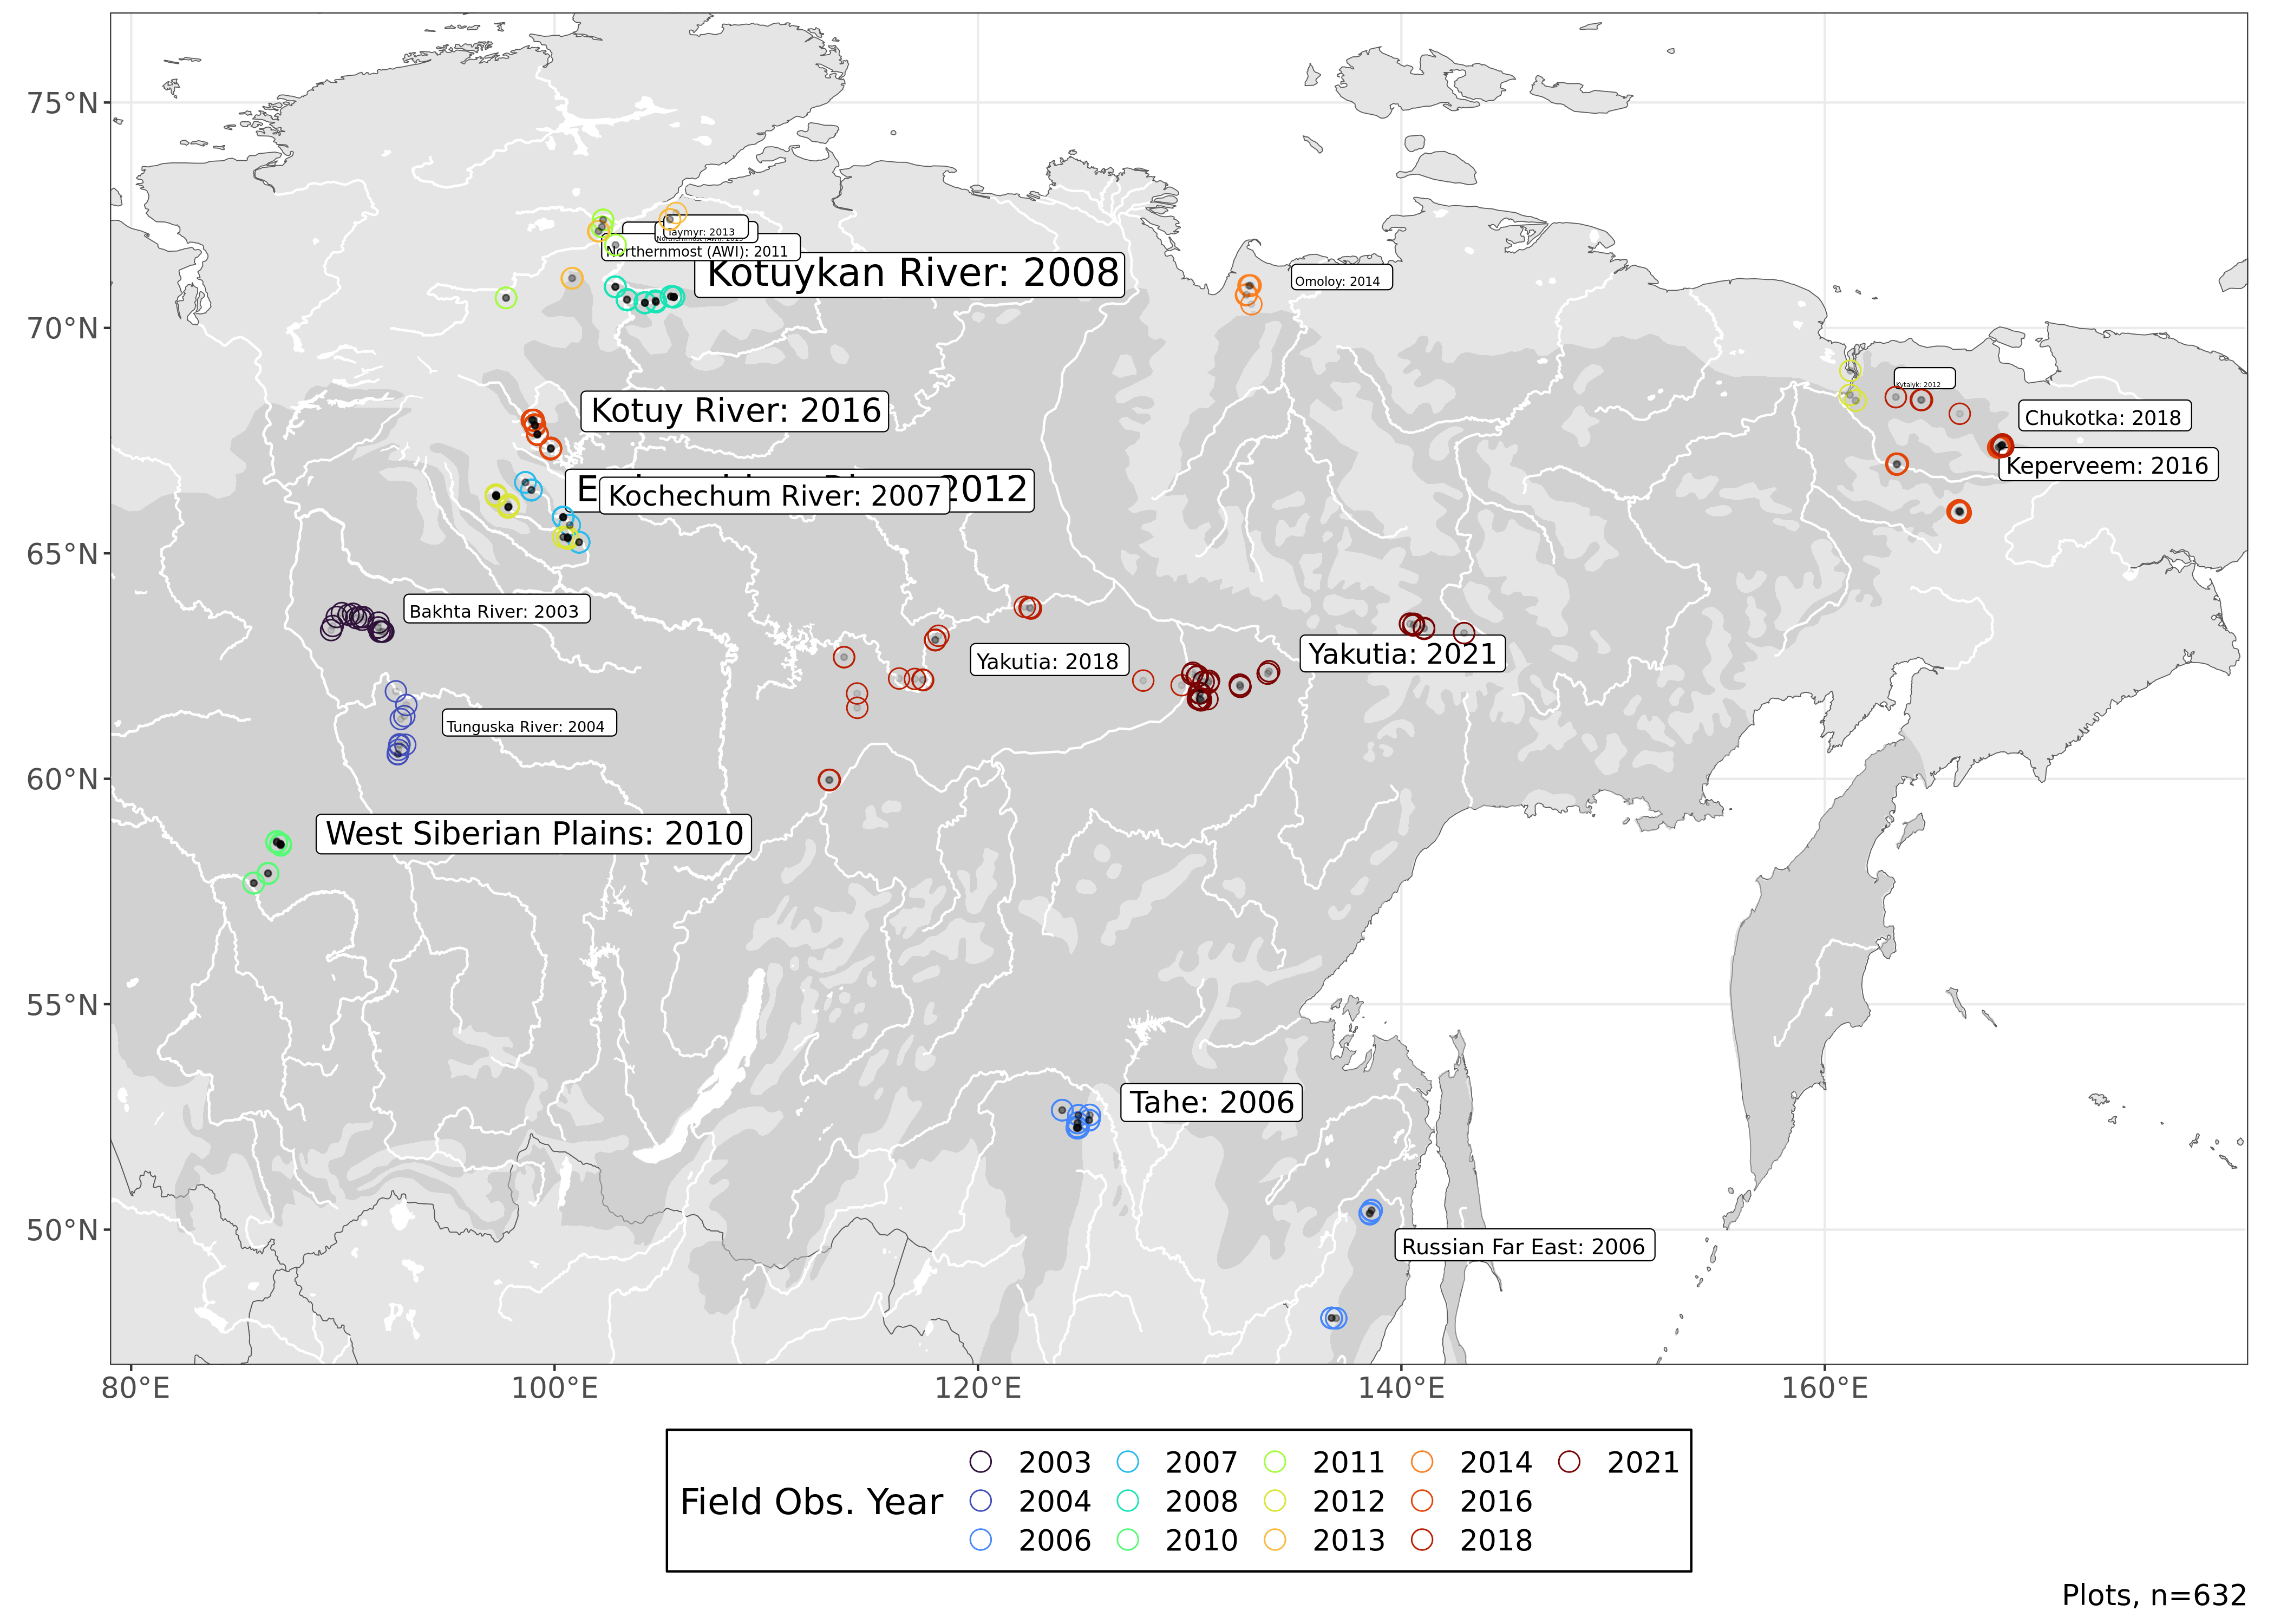

In [54]:
options(repr.plot.width = 14, repr.plot.height = 10)

worldmap = ne_countries(scale = 10, returnclass = 'sf')

map_plots = ggplot() + 
    geom_sf(data=worldmap) +
    geom_sf(data=boreal, alpha=0.5, fill='gray', color=NA) +
    geom_sf(data=sib_rivers, color='white', size=0.01) + 
    geom_sf(data=riv, color='white', size=0.01) +
    geom_sf(data=lakes, fill='white', color='white', size=0.01) +
    geom_sf_label(data=smry_plots_df, aes(label=group_year, size=n), vjust=0, hjust=0, nudge_x = 2) + 
    #geom_sf(data=meisner_df, alpha=1, size=5, color='orange', shape=21) + 
    #geom_sf(data=nasa_df, alpha=1, size=5, color='green', shape=21) + 
    geom_sf(data=val_plots_df %>% drop_na(), aes(color=factor(year)), shape=21, size=4) +
    geom_sf(data=val_plots_df %>% drop_na(), shape=19, size=1, alpha=0.1) +
    scale_color_viridis_d(option='turbo', name='Field Obs. Year') +
    scale_size_continuous(guide=FALSE) +
    theme_bw() +
    theme(text = element_text(size=16), legend.position = c(0.9, 0.85) )+
    theme(legend.background = element_rect(colour = 'black', fill = 'white', linetype='solid')) +
   coord_sf(xlim = c(79, 180), ylim = c(47, 77), expand = FALSE) +
    theme(legend.position="bottom") +
    labs(x=NULL, y=NULL, caption=paste0("Plots, n=", sum(smry_plots_df$n)))
    #facet_wrap(.~group_name)

map_plots

In [20]:
LC_pal = c("0"="#ffffff", "10"="#006400", "20"="#ffbb22", "30"="#ffff4c", "40"="#f096ff", "50"="#fa0000", "60"="#b4b4b4", "70"="#f0f0f0", "80"="#0064c8", "90"="#0096a0", "95"="#00cf75", "100"="#fae6a0")
LC_names = c("NoData", "Trees", "Shrubs", "Grass", "Crops", "Built-up", "Barren / Sparse", "Snow / Ice", "Water", "Herb. wetland", "Mangroves", "Moss / Lichen")
LC_vals = c(0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 100)
# Set up class colors
from_class_names = names(LC_pal)
col_pal = unname(LC_pal)
names(col_pal) = LC_names
col_pal

NoData           Trees          Shrubs           Grass           Crops 
      "#ffffff"       "#006400"       "#ffbb22"       "#ffff4c"       "#f096ff" 
       Built-up Barren / Sparse      Snow / Ice           Water   Herb. wetland 
      "#fa0000"       "#b4b4b4"       "#f0f0f0"       "#0064c8"       "#0096a0" 
      Mangroves   Moss / Lichen 
      "#00cf75"       "#fae6a0"

In [21]:
names(LC_vals) = LC_names
LC_vals

NoData           Trees          Shrubs           Grass           Crops 
              0              10              20              30              40 
       Built-up Barren / Sparse      Snow / Ice           Water   Herb. wetland 
             50              60              70              80              90 
      Mangroves   Moss / Lichen 
             95             100

In [22]:
# make a palette
col_pal

NoData           Trees          Shrubs           Grass           Crops 
      "#ffffff"       "#006400"       "#ffbb22"       "#ffff4c"       "#f096ff" 
       Built-up Barren / Sparse      Snow / Ice           Water   Herb. wetland 
      "#fa0000"       "#b4b4b4"       "#f0f0f0"       "#0064c8"       "#0096a0" 
      Mangroves   Moss / Lichen 
      "#00cf75"       "#fae6a0"

In [23]:
levels(val_plots_df$value_esawc2020) = c('Trees', 'Grass','Crops','Barren / Sparse','Water', 'Herb. wetland', 'Moss / Lichen')
levels(val_plots_df$value_esawc2020)

ERROR: Error in levels(val_plots_df$value_esawc2020) = c("Trees", "Grass", "Crops", : attempt to set an attribute on NULL


In [30]:
# NOT WORKING!
#plots_df$value_esawc2020  <- factor(plots_df$value_esawc2020, levels = c('Trees', 'Grass','Crops','Barren / Sparse','Water', 'Herb. wetland', 'Moss / Lichen'))
str(val_plots_df)

Classes ‘sf’ and 'data.frame':	632 obs. of  7 variables:
 $ group_name       : chr  "Khatanga" "Khatanga" "Khatanga" "Khatanga" ...
 $ year             : chr  "2011" "2011" "2011" "2011" ...
 $ ref_ht           : num  7.58 9 10 11.92 5 ...
 $ ref_ht_alpha     : num  70 81 28 58 95 262 98 62 184 91 ...
 $ value_ht_L30_2020: num  7.44 5.79 8.13 7.82 3.09 ...
 $ geom             :sfc_POINT of length 632; first list element:  'XY' num  -2152955 4943357
 $ diff_ht          : num  -0.145 -3.208 -1.87 -4.104 -1.906 ...
 - attr(*, "sf_column")= chr "geom"
 - attr(*, "agr")= Factor w/ 3 levels "constant","aggregate",..: NA NA NA NA NA NA
  ..- attr(*, "names")= chr [1:6] "group_name" "year" "ref_ht" "ref_ht_alpha" ...


In [26]:
######### NEED TO INSTALL PLYR
#df_eq <- ddply(val_plots_df %>% dplyr::select(value_ht_L30_2020, ref_ht, year, group_name ),.(ayear, group_name),c("lm_eqn") )

In [34]:
levels(factor(val_plots_df$year))
#mydf$task <- factor(mydf$task, levels = c("up", "down", "left", "right", "front", "back"))

[1] "2003" "2004" "2006" "2007" "2008" "2010" "2011" "2012" "2013" "2014"
[11] "2016" "2018" "2021"

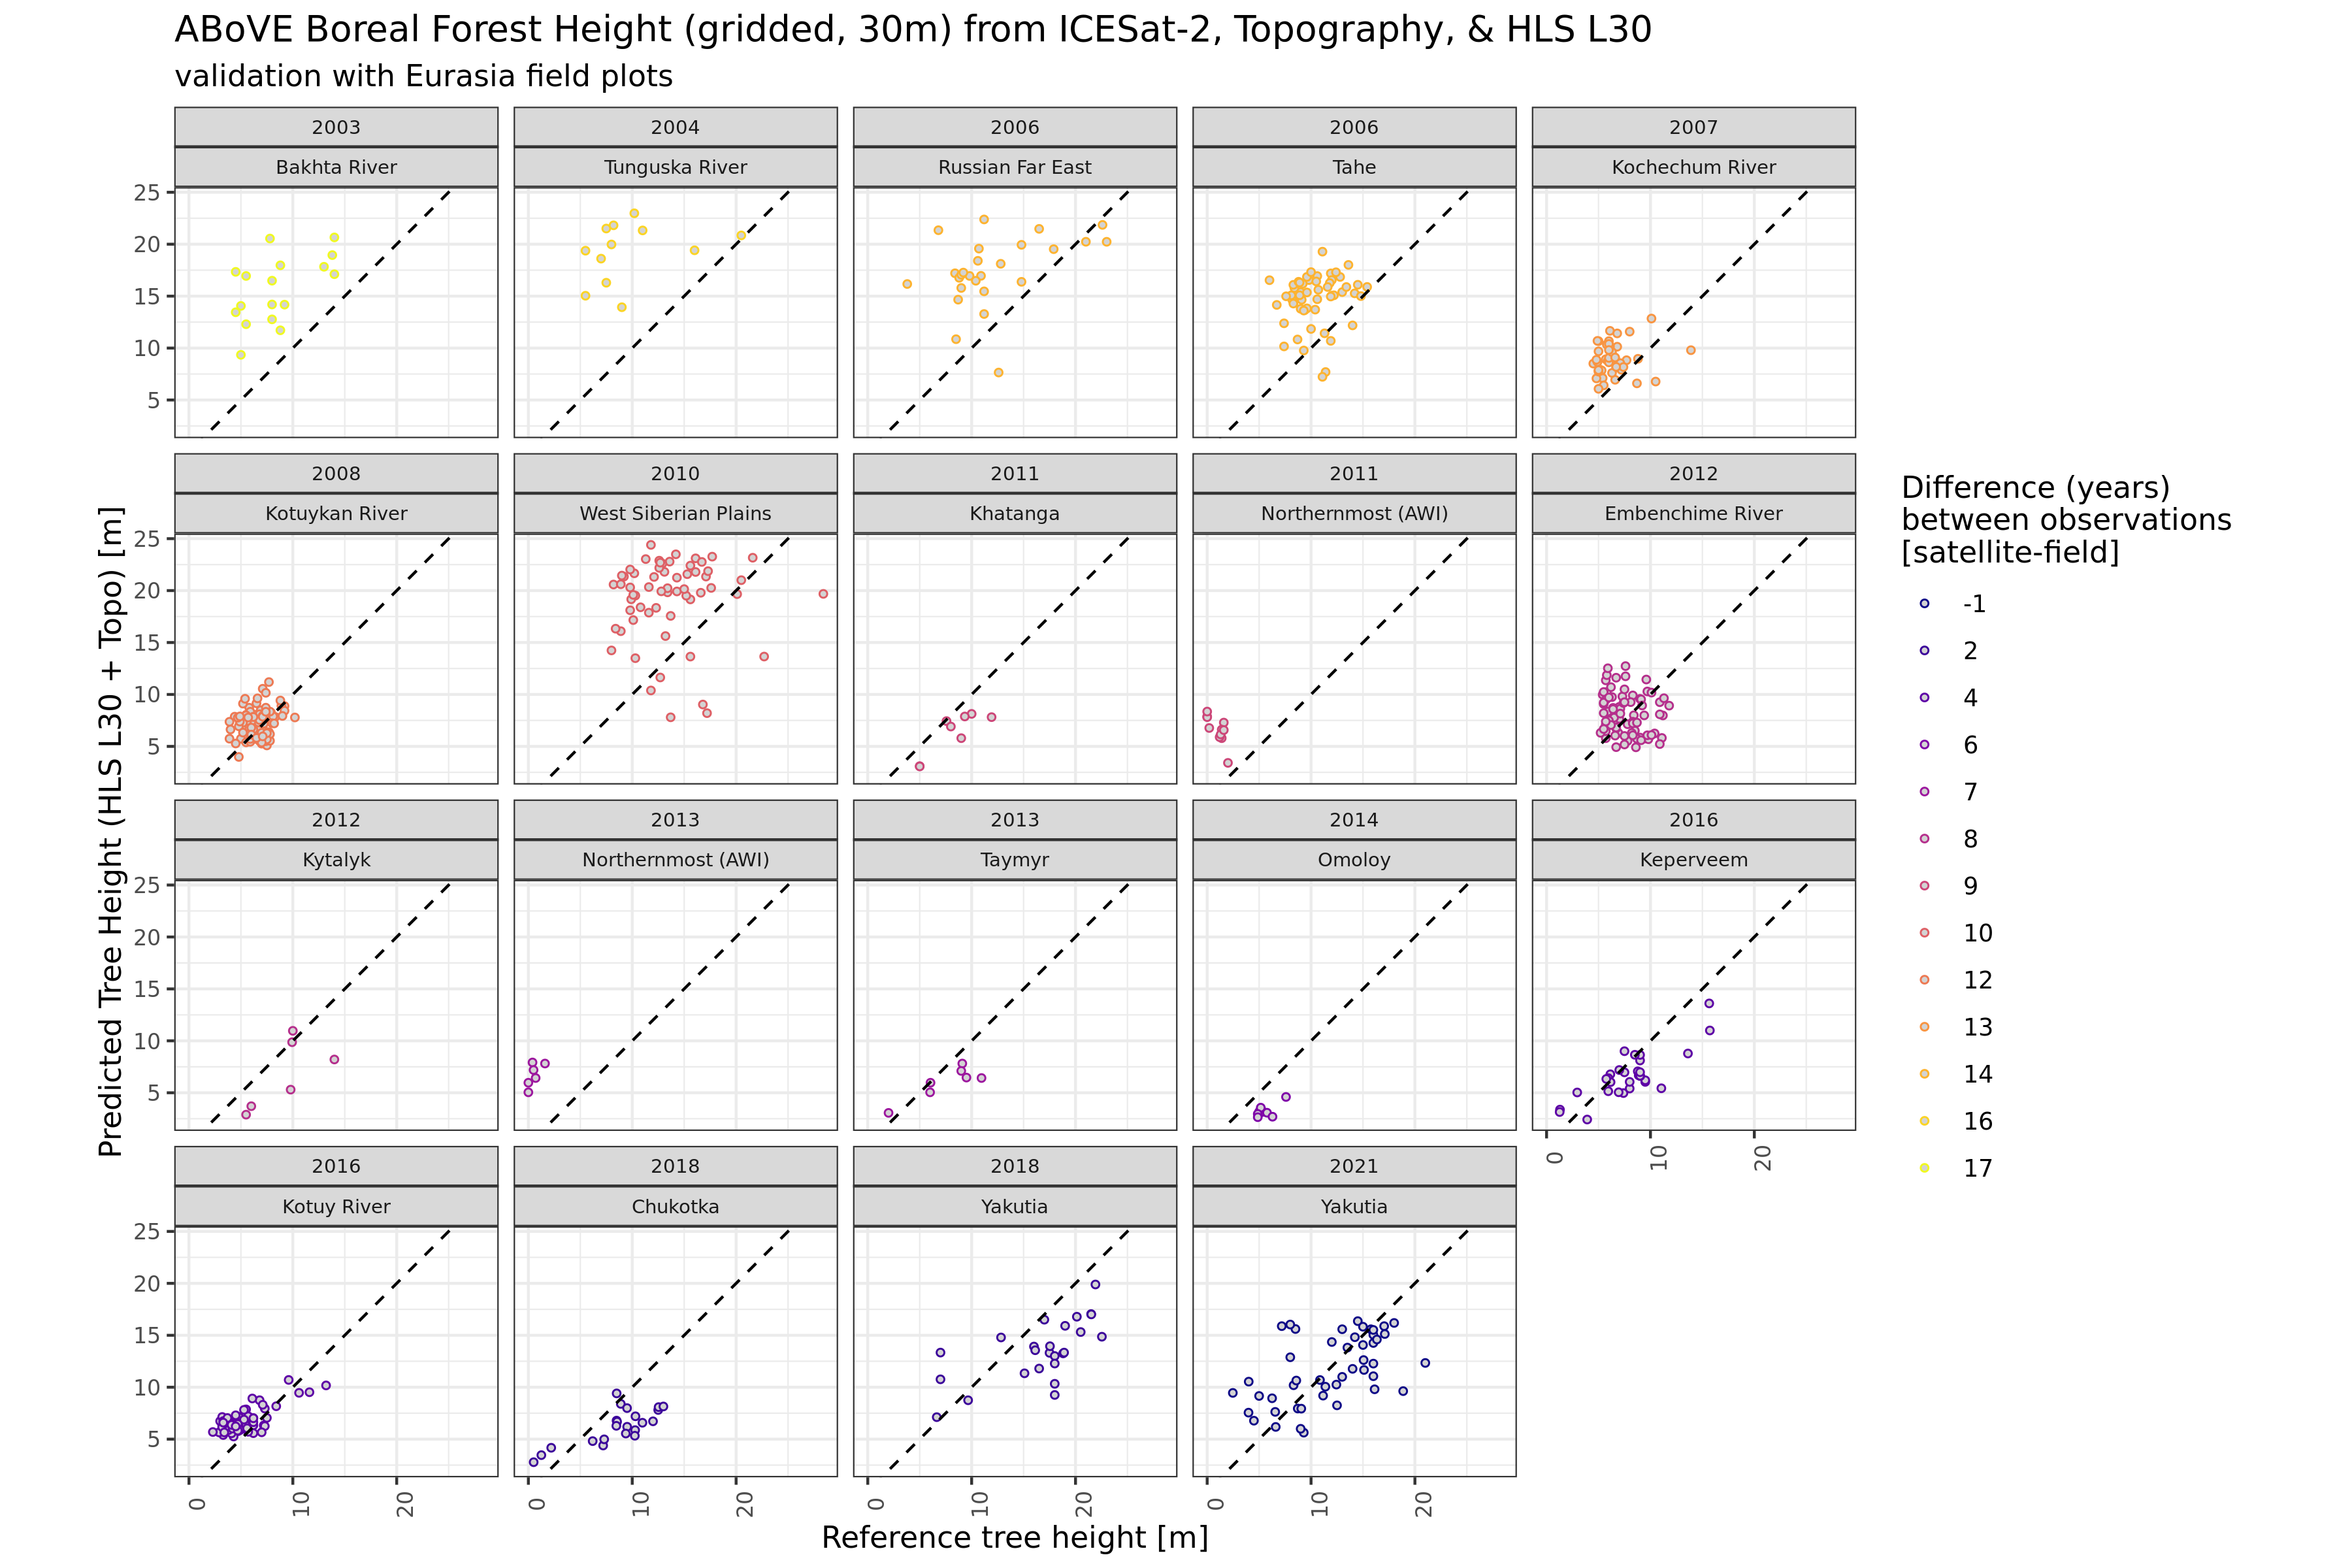

In [50]:
options(repr.plot.width = 12, repr.plot.height = 8, repr.plot.res = 300)

p_scat = val_plots_df %>% 
#arrange(year) %>%
#filter(!is.na(value_ht_L30_2020)) %>% 
    ggplot(aes(x=as.numeric(ref_ht), y=as.numeric(value_ht_L30_2020) )) + 
    geom_point(
        #aes(color=factor(value_esawc2020)), 
        aes(color=factor(diff_yr)),
        size=1, shape=21, fill='lightgrey') + 
    #scale_color_manual(values = c("#0072B2","#009E73","#D55E00")) +
    #scale_color_manual(values = col_pal, name='Land Cover Class') +
    scale_color_viridis_d(option='plasma', name='Difference (years)\nbetween observations\n[satellite-field]') +
    geom_abline(linetype='dashed') +
    coord_equal() +
    theme_bw() +
    theme(axis.text.x=element_text(angle=90, size=8), axis.text.y = element_text(size=8), strip.text = element_text(size=7)) + 
    labs(x='Reference tree height [m]', y = 'Predicted Tree Height (HLS L30 + Topo) [m]', title='ABoVE Boreal Forest Height (gridded, 30m) from ICESat-2, Topography, & HLS L30', subtitle='validation with Eurasia field plots') +
    facet_wrap(year+group_name~.)
    #facet_wrap(.~interaction(factor(value_esawc2020), factor(year)), ncol=4)
#facet_wrap(interaction(group_name, year)~.)

p_scat

### Look at height diffs

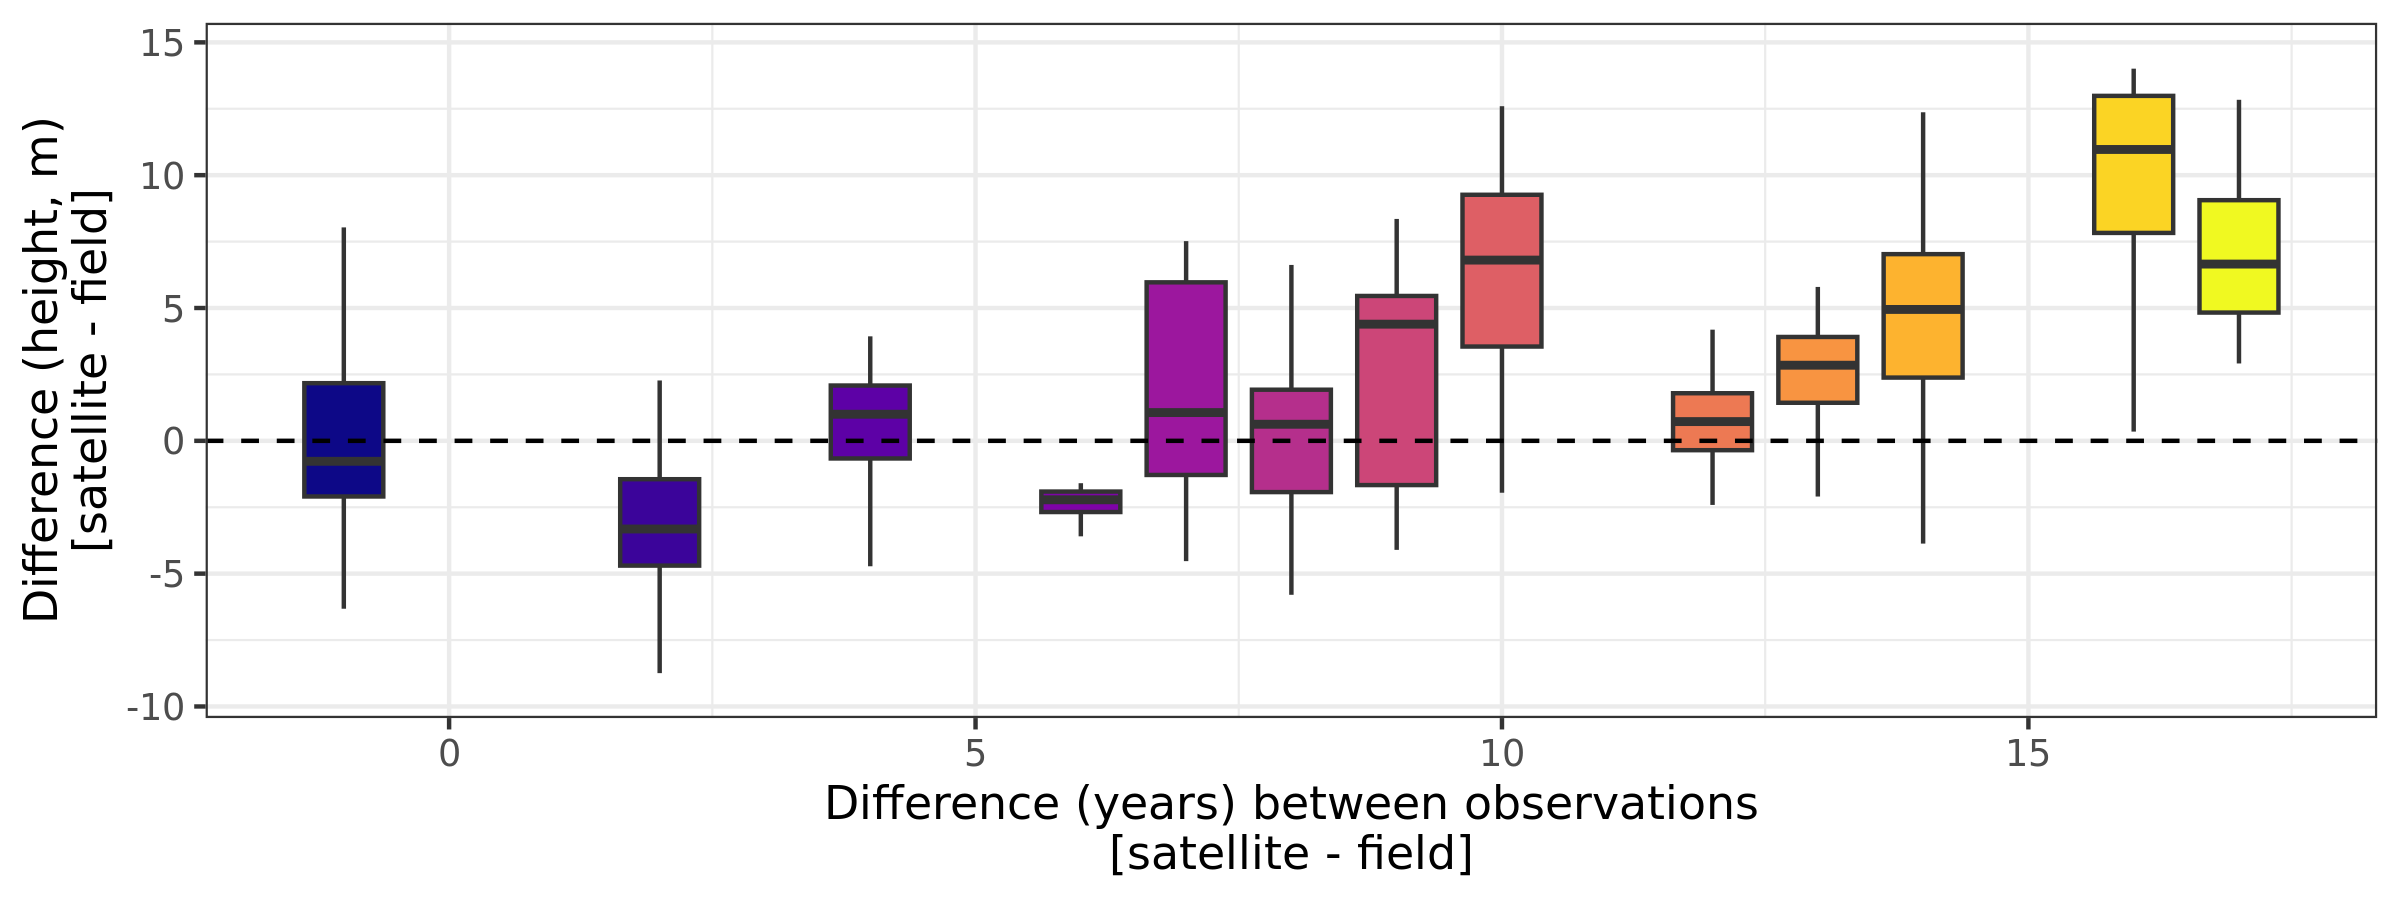

In [43]:
options(repr.plot.width = 8, repr.plot.height = 3, repr.plot.res = 300)

p_box = ggplot(val_plots_df) +
    geom_boxplot(aes(y=diff_ht, x=diff_yr, fill=factor(diff_yr)), outlier.size=-1) +
    geom_hline(aes(yintercept=0), linetype='dashed') +
    scale_fill_viridis_d(option='plasma', name='Years difference\n[satellite-field]', guide=FALSE) +
    coord_cartesian(ylim=c()) +
    labs(y='Difference (height, m)\n[satellite - field]', x='Difference (years) between observations\n[satellite - field]')+
    theme_bw()
p_box


In [184]:
val_plots_df %>%
st_write(dsn = '/projects/my-private-bucket/reference/val_plots.gpkg', layer = 'val_plots', append=FALSE)

Writing layer `val_plots' to data source 
  `/projects/my-private-bucket/reference/val_plots.gpkg' using driver `GPKG'
Writing 1511 features with 8 fields and geometry type Point.


Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
“st_point_on_surface may not give correct results for longitude/latitude data”


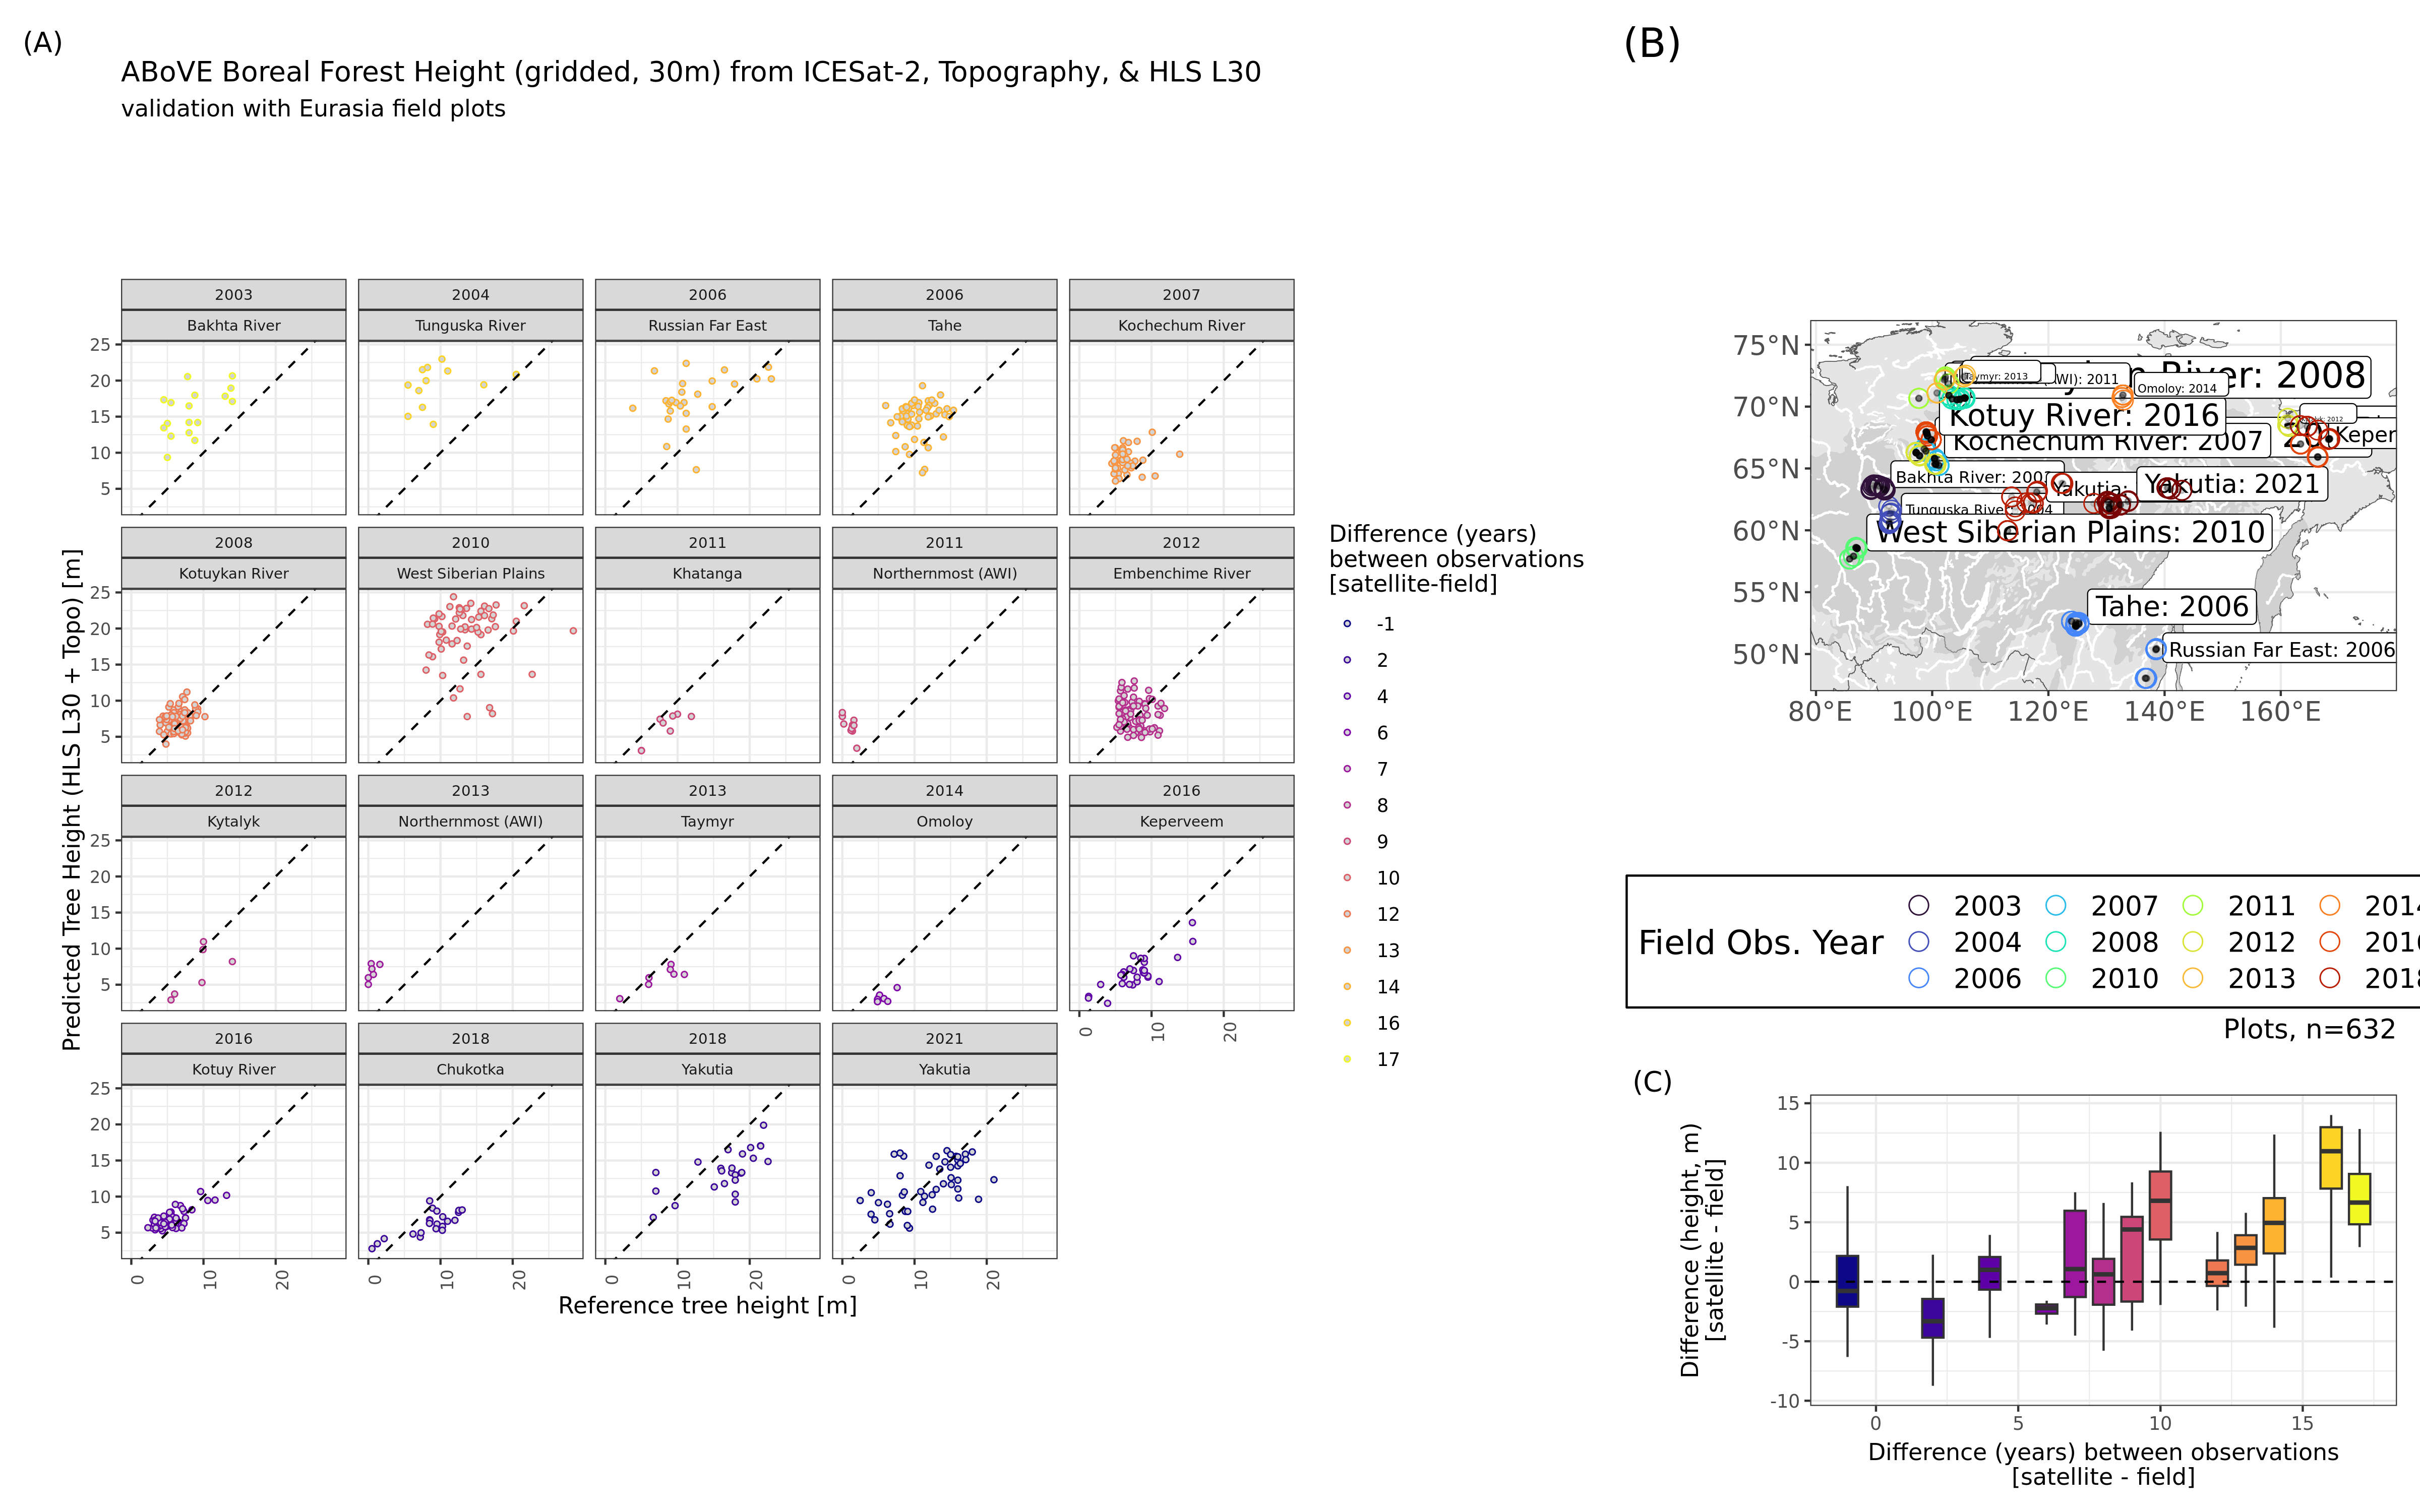

In [59]:
options(repr.plot.width = 16, repr.plot.height = 10, repr.plot.res = 300)

layout = "
AAAAAABBB
AAAAAABBB
AAAAAACCC
"
figure = (p_scat + guides(fill=guide_legend(title.position = "top", label.position = "bottom", legend.position='horizontal'
                                     #,keywidth = unit(.125, "cm"), keyheight = unit(1, "cm")
                                    )) ) +
    map_plots + p_box +
    plot_layout(design = layout) +
    plot_annotation(tag_levels = 'A',tag_prefix = '(', tag_sep = '', tag_suffix = ')') 


figure


In [33]:
# options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 300)
# # Show map of HLS compositing params

# m_ATL08obs_tile = DO_MAP_BOREAL_SP(MAP_EXTENT=ext,  
#                      boreal_shp_fn = boreal_shp_fn,
#                      LAYER_LIST = list(geom_sf(data=meisner_df))
#                                       )
#                     ) + 
#     theme(legend.text=element_text(size=rel(0.75))) +
#     guides(fill=guide_colourbar(title="# of filtered ATL08 30m obs.", title.position = "top", label.position = "bottom", keywidth = unit(.5, "cm"), keyheight = unit(.25, "cm")))+
#     scale_fill_viridis(option = 'mako', labels = scientific)

# m_ATL08obs_tile

Warning message:
“Removed 72 rows containing missing values (`geom_point()`).”


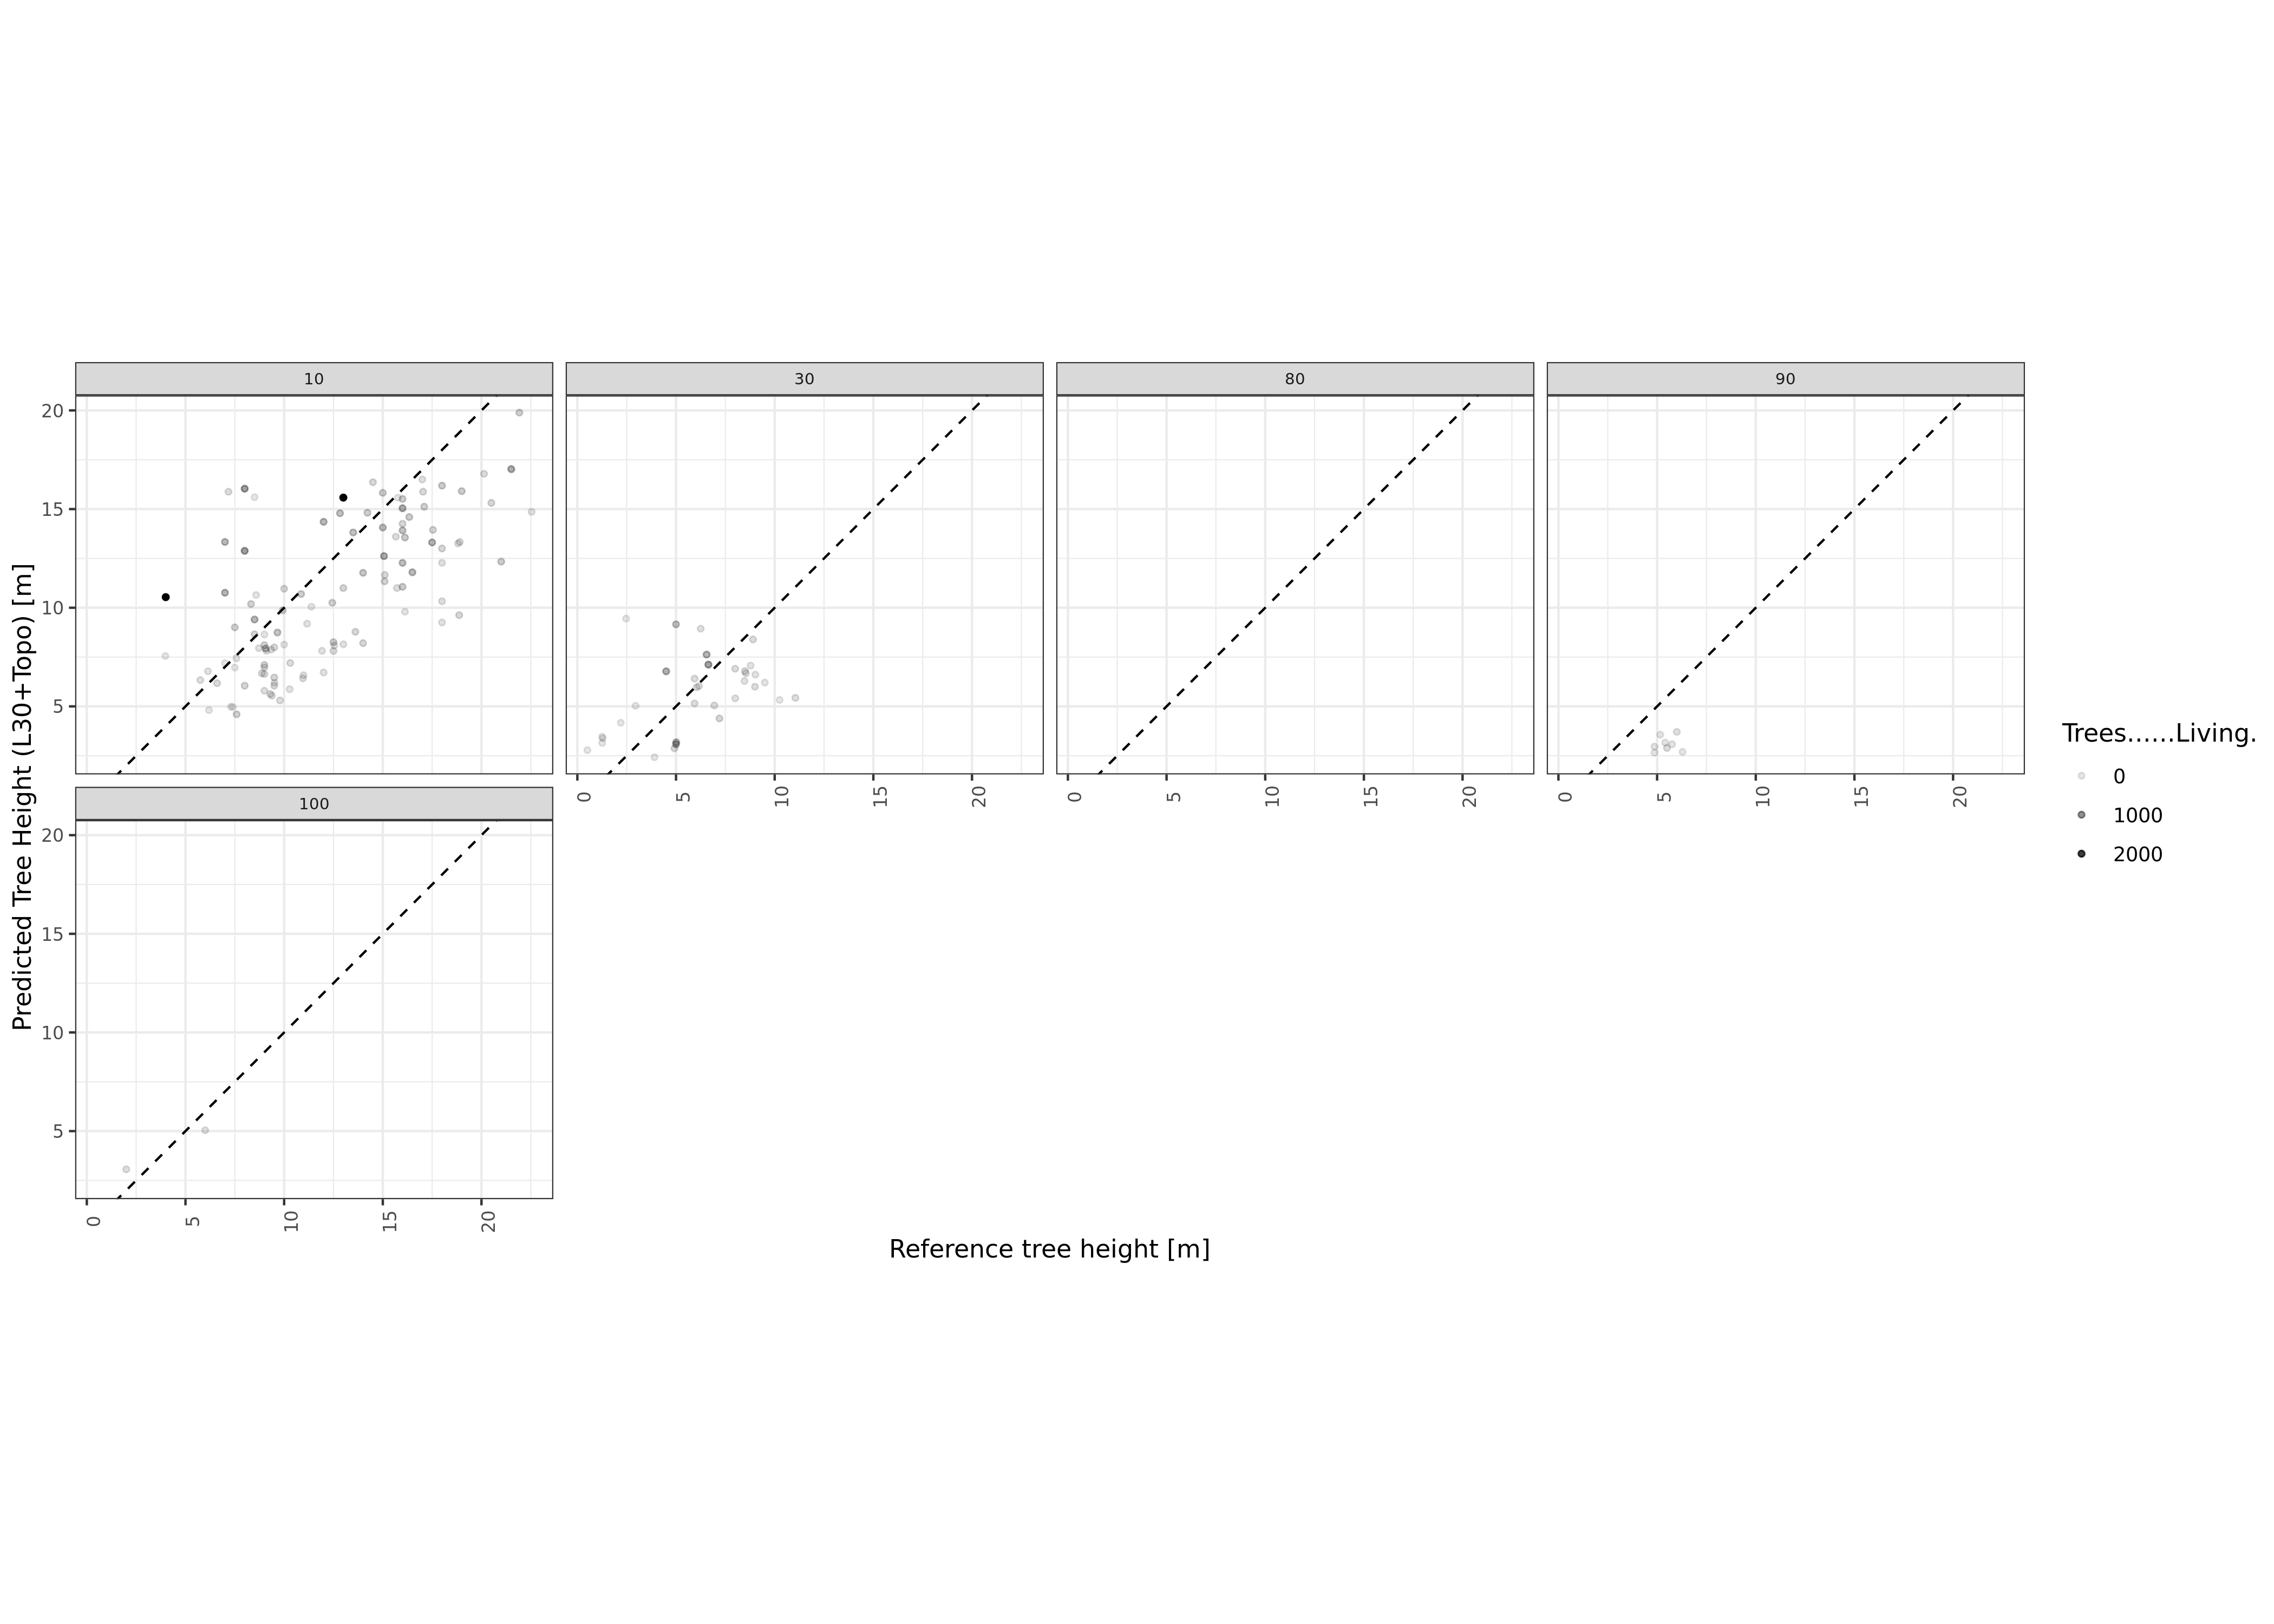

In [340]:
meisner_df %>%
ggplot(aes(x=as.numeric(Height.quantile..m...Quantile..98th..), y=value_ht_L30_2020)) + 
geom_point(aes(alpha=Trees......Living.), size=1) + 
scale_color_manual(values = c("#0072B2","#009E73","#D55E00")) +
geom_abline(linetype='dashed') +
coord_equal() +
theme_bw() +
theme(axis.text.x=element_text(angle=90, size=8), axis.text.y = element_text(size=8), strip.text = element_text(size=7)) + 
labs(x='Reference tree height [m]', y = 'Predicted Tree Height (L30+Topo) [m]') +
#facet_wrap(Forest.type~factor(Spec.No....), ncol=8)
facet_wrap(.~factor(value_esawc2020), ncol=4)

In [35]:
head(nasa_df %>% filter(group_name == 'Northernmost (AWI)') %>% select(c(contains("Ht")), group_name) %>% as.data.frame())

N_ht Ht_min Ht_mean Ht_med Ht_max Ht_qmch Ht_sd Ht_se value_ht_L30_2020
1 135  0.0    2.5     1.6     7.8   3.6     2.6   0.2   NA               
2 143  0.0    2.6     1.4     9.5   3.8     2.8   0.2   NA               
3   1  1.4    1.4     1.4     1.4   1.4      NA    NA   NA               
4 151  0.0    1.5     0.0    10.0   3.4     3.0   0.2   NA               
5 130  0.0    2.7     0.0    12.5   4.8     4.0   0.3   NA               
6   4  1.0    1.3     1.2     1.7   1.3     0.3   0.2   NA               
  group_name         geom                  
1 Northernmost (AWI) POINT (102.884 71.84) 
2 Northernmost (AWI) POINT (102.876 71.842)
3 Northernmost (AWI) POINT (97.707 70.667) 
4 Northernmost (AWI) POINT (97.712 70.669) 
5 Northernmost (AWI) POINT (97.706 70.665) 
6 Northernmost (AWI) POINT (97.706 70.667)

In [38]:
colnames(nasa_df)

[1] "site"                           "group_name"                    
 [3] "year"                           "glas_campaign"                 
 [5] "glas_ndx"                       "glas_shot"                     
 [7] "lat"                            "lon"                           
 [9] "rad_m"                          "num_plots"                     
[11] "plot_area_m2"                   "canopy_closure_perc"           
[13] "N_ht"                           "Ht_min"                        
[15] "Ht_mean"                        "Ht_med"                        
[17] "Ht_max"                         "Ht_qmch"                       
[19] "Ht_sd"                          "Ht_se"                         
[21] "N_dbh"                          "DBH_min"                       
[23] "DBH_mean"                       "DBH_med"                       
[25] "DBH_max"                        "DBH_sd"                        
[27] "DBH_se"                         "canopy_area_m2_sum"            
[29] "N_dens_ha"                      "tcc_perc"                      
[31] "index1"                         "value_esawc2020"               
[33] "value_standage2020"             "value_ht_L30_2020"             
[35] "value_AGB_L30_2020.v2023.local" "geom"

Warning message:
“Removed 224 rows containing missing values (`geom_point()`).”


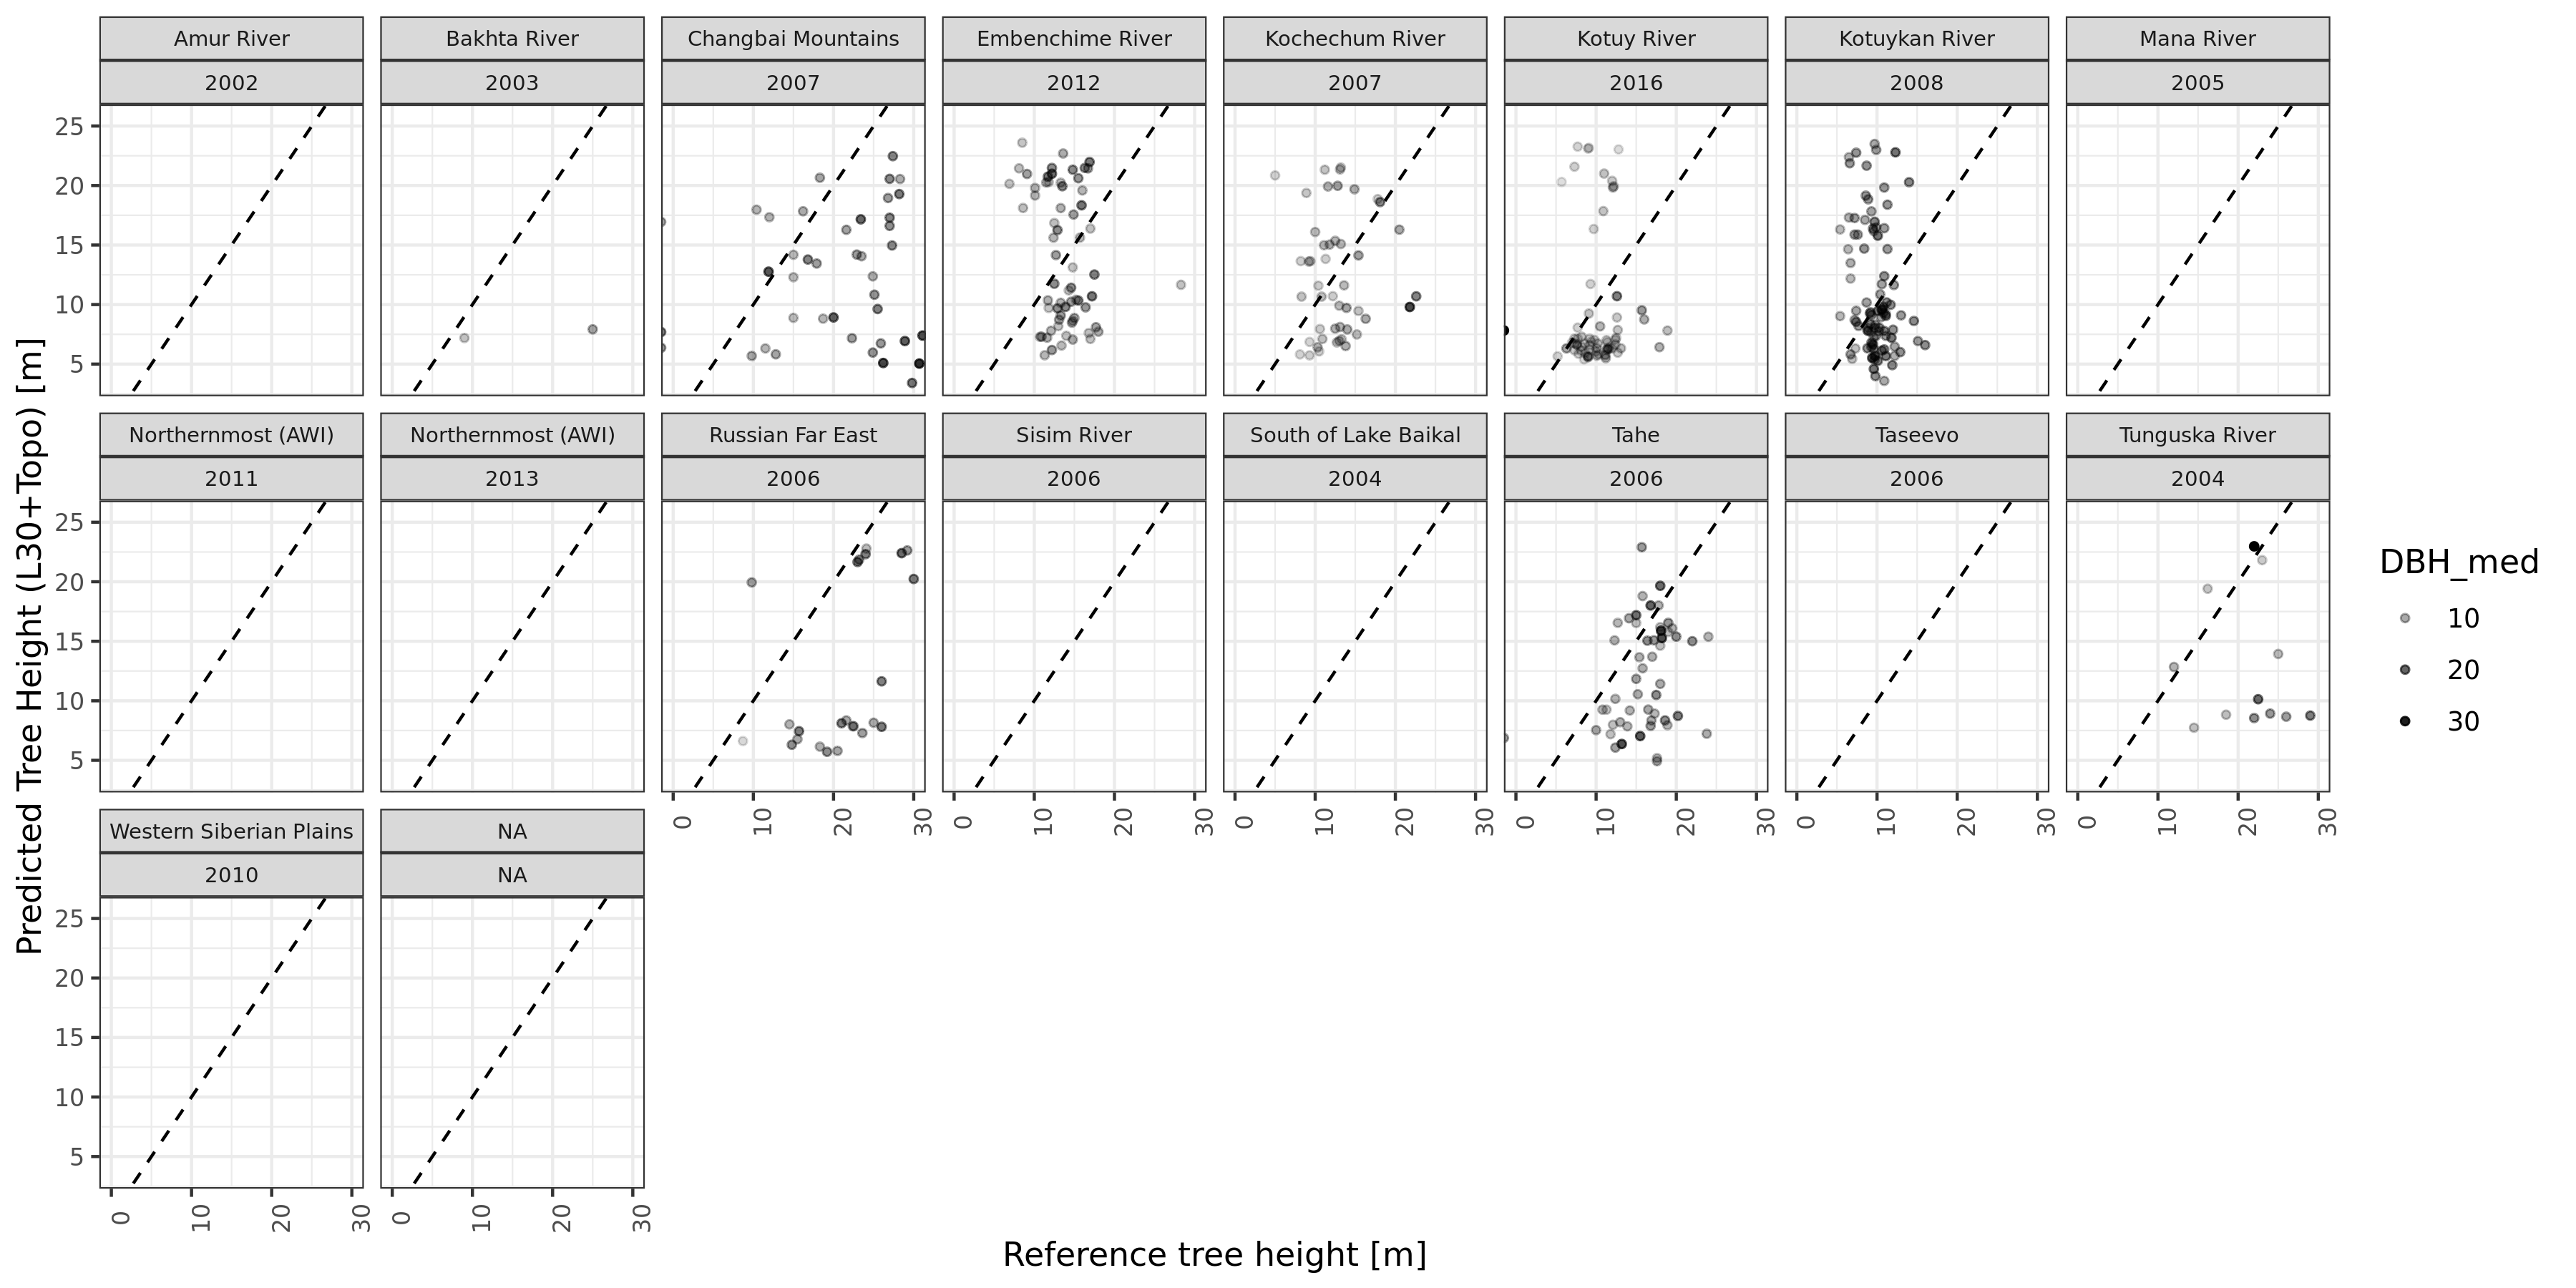

In [43]:
options(repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 300)

nasa_df %>%
ggplot(aes(x=Ht_max, y=value_ht_L30_2020)) + 
geom_point( aes(alpha=DBH_med), size=1) + 
scale_color_manual(values = c("#0072B2","#009E73","#D55E00")) +
geom_abline(linetype='dashed') +
#coord_equal() +
theme_bw() +
theme(axis.text.x=element_text(angle=90, size=8), axis.text.y = element_text(size=8), strip.text = element_text(size=7)) + 
labs(x='Reference tree height [m]', y = 'Predicted Tree Height (L30+Topo) [m]') +
#facet_wrap(Forest.type~factor(Spec.No....), ncol=8)
facet_wrap(group_name~year, ncol=8)+
coord_cartesian(xlim=c(0,30))

# Code:
from above_lidar_check.Rmd  
turn into nice scatterplot functions

In [255]:
lm_eqn = function(df){
      y=df[,1]
      x=df[,2]
      m = lm(y ~ x, df);
      
      eq <- substitute(italic(y) == a + b %.% italic(x)*","~~italic(r)^2~"="~r2, 
           list(a = format(coef(m)[1], digits = 2), 
                b = format(coef(m)[2], digits = 2), 
               r2 = format(summary(m)$r.squared, digits = 3)))
      int = format(coef(m)[1], digits = 2)
      slope = format(coef(m)[2], digits = 2)
      # https://stackoverflow.com/questions/43123462/how-to-obtain-rmse-out-of-lm-result
      
      rss   <- c(crossprod(m$residuals))
      mse   <- rss / length(m$residuals)
      
      rmse  <- format(sqrt(mse),dig=2)
      sig2  <- format(rss / m$df.residual, dig=2) # Pearson estimated residual variance (as returned by summary.lm):
      n     <- nobs(m)
      r2    <- format(summary(m)$r.squared, dig = 2)
      mae   <- format(mean(abs(m$residuals)), dig = 2)
      mape  <- format(mean(abs((m$residuals)/y))*100, dig=2)  #https://stats.stackexchange.com/questions/299712/what-are-the-shortcomings-of-the-mean-absolute-percentage-error-mape

      #return(as.character(as.expression(eq)))
      return(data.frame(cbind(int, slope, r2, rmse, sig2, n, mae, mape)))
  }
# val_plot_geom_list = list(
#         ggtitle("Boreal tree canopy cover: LVIS vs GLiHT", subtitle = paste0("Tree canopy cover (",tcc_type,") by topographic aspect (Flat = < 3° slope)")),
#         #scale_fill_gradientn( labels = my_breaks, breaks = my_breaks, limits = c(min(my_breaks),max(my_breaks)+3000),colours=pal_rev_spectral9, trans = "log", name='# obs.'),
#         scale_fill_gradientn( labels = c(1,10,100), breaks = c(1,10,100), limits = c(1,500), colours=pal_rev_spectral9, trans = "log", name='# obs.'),
#         guides(colour = guide_legend(override.aes = list(alpha = 1))),
#         #geom_vline(xintercept = 0, linetype = "dashed"),
#         #geom_hline(yintercept = 0, linetype = "dashed"),
#         geom_abline(intercept = 0, slope = 1, size= 0.25),
#         stat_smooth(method = "lm", col = "black", linetype = "dashed"),
#         theme_minimal()+
#           theme(axis.text = element_text(size = 6)),
#         coord_fixed()
# )

In [10]:
#
# Height: Check LVIS height estimate with GLiHT
#
# 
maindir = 'D:\\projects\\ABoVE_lidar'#'C:/Users/pmontesa/Google Drive/ABoVE_lidar'
RES=30
for(ref_ht_type in c('rh85','rh90','rh100')){
  

  if(FALSE){
    samples_val_gliht2014_lvis2017 = data.frame(read.csv(paste0(maindir, "\\", "SAMPLE_stack_",ref_ht_type,"_",RES,"m_GLIHT2014_lvisf2017_rh098_",RES,"m.csv"), header=T))
    samples_val_gliht2014_lvis2019 = data.frame(read.csv(paste0(maindir, "\\", "SAMPLE_stack_",ref_ht_type,"_",RES,"m_GLIHT2014_lvisf2019_rh098_",RES,"m.csv"), header=T))
    samples_val_gliht2018_lvis2019 = data.frame(read.csv(paste0(maindir, "\\", "SAMPLE_stack_",ref_ht_type,"_",RES,"m_GLIHT2018_lvisf2019_rh098_",RES,"m.csv"), header=T))
  }else{
    samples_val_gliht2014_lvis2017 = st_read(paste0(maindir, "\\", "SAMPLE_stack_",ref_ht_type,"_",RES,"m_GLIHT2014_lvisf2017_rh098_",RES,"m.geojson"))
    samples_val_gliht2014_lvis2019 = st_read(paste0(maindir, "\\", "SAMPLE_stack_",ref_ht_type,"_",RES,"m_GLIHT2014_lvisf2019_rh098_",RES,"m.geojson"))
    samples_val_gliht2018_lvis2019 = st_read(paste0(maindir, "\\", "SAMPLE_stack_",ref_ht_type,"_",RES,"m_GLIHT2018_lvisf2019_rh098_",RES,"m.geojson"))
  }
  
  ht_type = paste0("LVISFrh98_GLiHT", ref_ht_type)
  
  samples_val_gliht2014_lvis2017$var_ref = "GLiHT 2014"
  samples_val_gliht2014_lvis2017$var_src = "LVISF 2017"
  samples_val_gliht2014_lvis2019$var_ref = "GLiHT 2014"
  samples_val_gliht2014_lvis2019$var_src = "LVISF 2019"
  samples_val_gliht2018_lvis2019$var_ref = "GLiHT 2018"
  samples_val_gliht2018_lvis2019$var_src = "LVISF 2019"
  
  
  # Convert to basic data.frame
  df_val = as.data.frame(rbind(samples_val_gliht2014_lvis2017, samples_val_gliht2014_lvis2019, samples_val_gliht2018_lvis2019) )
  df_val$tree_fcover = df_val$tree_fcover * 100
  
  # Get aspect_class and landform_class from tte_classification
  df_val$aspect_class = ifelse(df_val$constant < 100, 0, substr(df_val[,'constant'], 1, nchar(df_val[,'constant'])-2) )
  df_val$landform_class = ifelse(df_val$constant < 100, df_val$constant, gsub("(?<![0-9])0+", "", substr(df_val[,'constant'], 2, 3 ), perl = TRUE) )
  cc_bin=20
  df_val$tree_fcover_class = cut(df_val$tree_fcover, seq(0,100,cc_bin),  include.lowest=TRUE, labels= as.character(seq(cc_bin,100,cc_bin)) )
  
  # Relabel aspect classes
  df_val$aspect_class = plyr::mapvalues(as.factor(df_val$aspect_class), from = c("0","1","2","3","4"), to =  c("Flat (<3°)","North","East","South","West"))
  df_val$tree_fcover_class = plyr::mapvalues(as.factor(df_val$tree_fcover_class), from = c("20","40","60","80","100"), to =  c("< 20%","20-40%","40-60%","60-80%","80-100%"))
  # Indicate facet type
  facet_type = "aspectclass"#"aspectclass_landformclass"


  htmax = 25
  # Create the equation labels for the two groups
  plot_title = list(
    ggtitle(paste0("Boreal forest height from LVIS at ",RES,"m : comparison with legacy GLiHT"), subtitle = paste0("Crossovers of LVISF rh98 2017, 2019 with GLiHT ",ref_ht_type," 2014, 2018"))
  )
  plot_labs_scales = list(
                labs(title=NULL, subtitle=NULL, y="Canopy Height (LVISF rh98; m)", 
                     # x=paste0("Canopy Height (GLiHT ",ref_ht_type,"; m)" )
                     x = as.expression(bquote("Canopy Height (GLiHT"~.(ref_ht_type)[CHM]~")"))
                      #,caption = "Source: above_lidar_check.Rmd"
                     ) ,
                
                scale_y_continuous(breaks = seq(0,htmax,5), limits = c(0,htmax)),
                scale_x_continuous(breaks = seq(0,htmax,5), limits = c(0,htmax))
  )
  df_eq <- ddply(df_val %>% dplyr::select(src, ref, aspect_class, var_src, var_ref ),.(aspect_class, var_src),c("lm_eqn") )#"landform_class"
  
  plot_lvis_gliht = ggplot(df_val, aes(x=ref, y=src))+
    #labs(title = "Height: LVIS & GLiHT", caption = "Source: above_lidar_check.Rmd")+
      geom_bin2d(binwidth = c(0.25, 0.25))+
    geom_label(data=df_eq, aes(x = 0.1, y = htmax,label=paste("r^2 ==", r2,sep='')), parse = TRUE, hjust="inward", vjust="inward", size=2, color = "black", fill="white", label.padding=unit(0.1,"lines"))+
    geom_label(data=df_eq, aes(x = 0.1, y = htmax-3,label=paste("rmse ==", rmse,sep='')), parse = TRUE, hjust="inward", vjust="inward", size=2, color = "black", fill="white", label.padding=unit(0.1,"lines"))+
    geom_label(data=df_eq, aes(x = 0.1, y = htmax-6,label=paste("bias ==", int,sep='')), parse = TRUE, hjust="inward", vjust="inward", size=2, color = "black", fill="white", label.padding=unit(0.1,"lines"))+
    geom_label(data=df_eq, aes(x = 0.1, y = htmax-9,label=paste("slope ==", slope,sep='')),parse = TRUE, hjust="inward", vjust="inward", size=2, color = "black", fill="white", label.padding=unit(0.1,"lines"))+
    #geom_text(data=df_eq, aes(x = 100, y = 5,label=paste("sig2 ==",sig2,sep='')), parse = TRUE, hjust=1, vjust=0, size=3)+
    scale_fill_gradientn( labels = c(1,10,100), breaks = c(1,10,100), limits = c(1,500), colours=pal_rev_spectral9, trans = "log", name='# obs.')+
    facet_grid(var_src+var_ref~aspect_class)+
    val_plot_geom_list+
    plot_labs_scales
  
  #print(plot_lvis_gliht)
  ggsave(plot = plot_lvis_gliht,
           file = paste0(maindir,"//above_lidar_chk//", "plots_HT_validation_lvis_gliht_",ht_type,"_",facet_type,"_",RES,"m.png"), 
         device = 'png', dpi = 300, width = 8, height = 5)
  
  # Create the equation labels for the two groups
  df_eq <- ddply(df_val %>% dplyr::select(src, ref, aspect_class, var_src, var_ref, tree_fcover_class ),.(var_src, var_ref, tree_fcover_class),c("lm_eqn") )#"landform_class"
  facet_type = "year"
  plot_lvis_gliht_treefcover= ggplot(df_val, aes(x=ref, y=src))+
      #geom_point(alpha=0.01)+
    geom_bin2d(binwidth = c(.1, .1))+
    geom_label(data=df_eq, aes(x = 0.1, y = htmax, label=paste("r^2 ==", r2,sep='')), parse = TRUE, hjust="inward", vjust="inward", size=2, color = "black", fill="white", label.padding=unit(0.1,"lines"))+
    geom_label(data=df_eq, aes(x = 0.1, y = htmax-3.5, label=paste("rmse ==", rmse, sep='')), parse = TRUE, hjust="inward", vjust="inward", size=2, color = "black", fill="white", label.padding=unit(0.1,"lines"))+
    geom_label(data=df_eq, aes(x = 0.1, y = htmax-6.5, label=paste("bias ==", int, sep='')), parse = TRUE, hjust="inward", vjust="inward", size=2, color = "black", fill="white", label.padding=unit(0.1,"lines"))+
    geom_label(data=df_eq, aes(x = 0.1, y = htmax-9.5, label=paste("slope ==", slope, sep='')),parse = TRUE, hjust="inward", vjust="inward", size=2, color = "black", fill="white", label.padding=unit(0.1,"lines"))+
    scale_fill_gradientn( labels = c(1,10,100), breaks = c(1,10,100), limits = c(1,500), colours=pal_rev_spectral9, trans = "log", name='# obs.')+
    facet_grid(var_src+var_ref~tree_fcover_class)+
    val_plot_geom_list+
    plot_labs_scales
  
  print(plot_lvis_gliht_treefcover + plot_title)
    ggsave(plot = plot_lvis_gliht_treefcover,
           file = paste0(maindir, "//above_lidar_chk//", "plots_HT_validation_lvis_gliht_treefcover_",ht_type,"_",facet_type,"_",RES,"m.tif"), 
         device = 'tiff', dpi = 300, width = 8, height = 4)
  ggsave(plot = plot_lvis_gliht_treefcover,
           file = paste0(maindir, "//above_lidar_chk//", "plots_HT_validation_lvis_gliht_treefcover_",ht_type,"_",facet_type,"_",RES,"m.png"), 
         device = 'png', dpi = 300, width = 8, height = 4)
}

[1] 104  69